In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

# F-Model

In [2]:
class layer_initializer(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = keras.layers.Conv2D(
            filters=64,
            activation=tf.nn.relu,
            kernel_size=[5, 5],
            padding="same",
             kernel_initializer = 'glorot_uniform'
        )
        self.pool1 = keras.layers.MaxPool2D(
            pool_size=[2, 2],
            strides=2
        )
        self.conv2 = keras.layers.Conv2D(
            filters=64,
            activation=tf.nn.relu,
            kernel_size=[5, 5],
            padding="same",
             kernel_initializer = 'glorot_uniform'
        )
        self.pool2 = keras.layers.MaxPool2D(
            pool_size=[2, 2],
            strides=2
        )
        self.conv3 = keras.layers.Conv2D(
            filters=64,
            activation=tf.nn.relu,
            kernel_size=[5, 5],
            padding="same",
            kernel_initializer='glorot_uniform'
        )
        self.pool3 = keras.layers.MaxPool2D(
            pool_size=[2, 2],
            strides=2
        )
        self.fc1 = keras.layers.Dense(
            units=128,
            activation=tf.nn.relu,
             kernel_initializer = 'glorot_uniform'
        )
        self.fc2 = keras.layers.Dense(
            units=64,
            activation=tf.nn.relu,
            kernel_initializer='glorot_uniform'
        )

        self.fc3 = keras.layers.Dense(
            units=1,
             kernel_initializer = 'glorot_uniform'
        )
        self.survival_fc= keras.layers.Dense(
            units=4800,
             kernel_initializer = 'glorot_uniform'
        )
    def call(self, Input,layer_limit):
        Input = np.expand_dims(Input,axis=0)
        Input = np.expand_dims(Input, axis=3)
        x = self.conv1(Input)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        print(x.shape)
        x = tf.reshape(x, shape=(1,-1))
        try:
            x = self.fc1(x)
        except:
            x=self.survival_fc(x)
            x=self.fc1(x)
        x= self.fc2(x)
        self.x = self.fc3(x)
        #self.x=tf.maximum(x,1)
        #self.x=tf.minimum( self.x,layer_limit)
        return self.x
    def learn(self,real_layer):
        self.loss=tf.reduce_mean(tf.keras.losses.MSE( self.x,real_layer))
        return  self.loss
    def train(self,iters,Input,real_label,layer_limit):
        iter_=0
        done=0
        loss_record=[]
        acc=[]
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
        with tf.GradientTape(persistent=True) as tape:
            for i in range(iters):
                x=self(Input,layer_limit)
                loss = tf.reduce_mean(tf.keras.losses.MSE(x, real_label))
                grads=tape.gradient(loss,self.variables)
                optimizer.apply_gradients(grads_and_vars=zip(grads,self.variables))
                loss_record.append(loss.numpy())
                acc.append(x[0][0]/real_label)
        return loss_record,acc

# Visualization and math tools

In [3]:
def visualization(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:                    
        plt.subplot(2,3,cnt)
        plt.title("Loss function {}".format(keys[cnt-1]))
        t,v=history["t"],history["v"]
        plt.plot(t,label="Train")
        plt.plot(v,label="Valid")
        plt.xlabel("Iteration")
        plt.ylabel("loss value")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("loss.jpg")
    plt.show()
def visualization_without_nl(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:
        plt.subplot(2,3,cnt)
        plt.title("Loss function {}".format(keys[cnt-1]))
        t,v=history["t"],history["v"]
        plt.plot(t,label="Train")
        plt.plot(v,label="Valid")
        plt.xlabel("Iteration")
        plt.ylabel("loss value")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("loss_wnl.jpg")
    plt.show()
def acc_visualization(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:
        plt.subplot(2,3,cnt)
        plt.title("Accuracy of F model {}".format(keys[cnt-1]))
        t,v=history["t"],history["v"]
        plt.plot(t,label="Train")
        plt.plot(v,label="Valid")
        plt.xlabel("Iteration")
        plt.ylabel("accuracy")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("acc.jpg")
    plt.show()
def acc_visualization_without_nl(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:
        plt.subplot(2,3,cnt)
        plt.title("Accuracy of F model {}".format(keys[cnt-1]))
        t,v=history["t"],history["v"]
        plt.plot(t,label="Train")
        plt.plot(v,label="Valid")
        plt.xlabel("Iteration")
        plt.ylabel("accuracy")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("acc_wnl.jpg")
    plt.show()
    
def visualization_bh_iris(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:
        plt.subplot(2,3,cnt)
        plt.title("Loss function {}".format(keys[cnt-1]))
        t,v=history["bh"],history["iris"]
        plt.plot(t,label="bh")
        plt.plot(v,label="iris")
        plt.xlabel("Iteration")
        plt.ylabel("loss value")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("loss_iris_bn.jpg")
    plt.show()
def acc_visualization_iris_bn(histories,keys):
    plt.figure(figsize=(10,10))
    plt.grid()
    cnt=1
    for history in histories:
        plt.subplot(2,3,cnt)
        plt.title("Accuracy of F model {}".format(keys[cnt-1]))
        t,v=history["bh"],history["iris"]
        plt.plot(t,label="bh")
        plt.plot(v,label="iris")
        plt.xlabel("Iteration")
        plt.ylabel("accuracy")
        plt.xticks()
        plt.yticks()
        cnt+=1
        plt.legend()
    plt.savefig("acc_iris_bn.jpg")
    plt.show()
def normalize(data):
    return (data-data.mean())/(data.max()-data.min())

# Train without normalizaiton


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3,

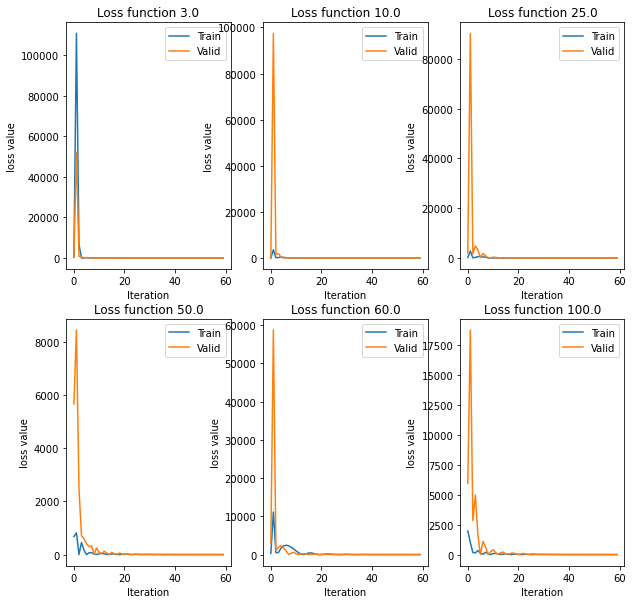

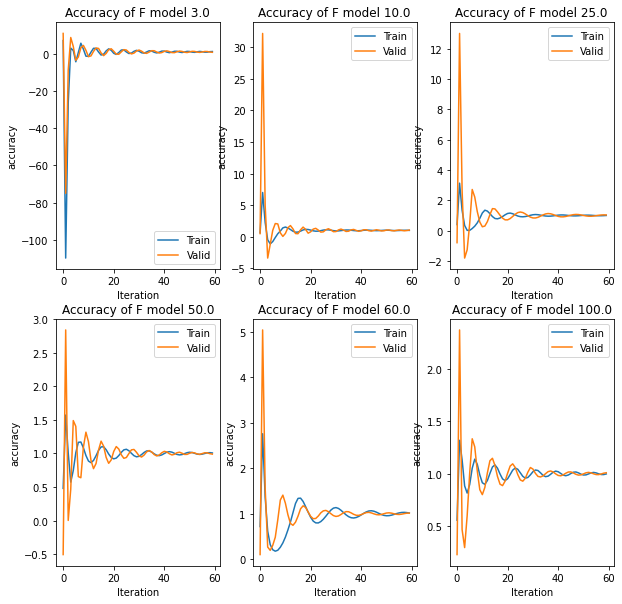

In [23]:
F=layer_initializer()
(train_x,__),(test_x,__)=keras.datasets.boston_housing.load_data()
np.random.shuffle(train_x)
np.random.shuffle(test_x)
real_layer=[3.,10.,25.,50.,60.,100.]
Input_train=train_x[0:100]
Input_test=test_x[0:100]
F(Input_train,1)
F.learn(1)
History=[]
history={}
History2=[]
history2={}
prediction_train=[]
pridiction_valid=[]
start=time.time()
accuracy=[]
for i in real_layer:
    history["t"],history2["t"]=F.train(60,Input_train,i,15)
    prediction_train.append(F(Input_train,15)[0][0])
    pridiction_valid.append(F(Input_test,15)[0][0])
    F=layer_initializer()
    history["v"],history2["v"]=F.train(60,Input_test,i,15)
    History.append(history)
    History2.append(history2)
    history={}
    history2={}
total_cost=time.time()-start
visualization_without_nl(History,real_layer)
acc_visualization(History2,real_layer)

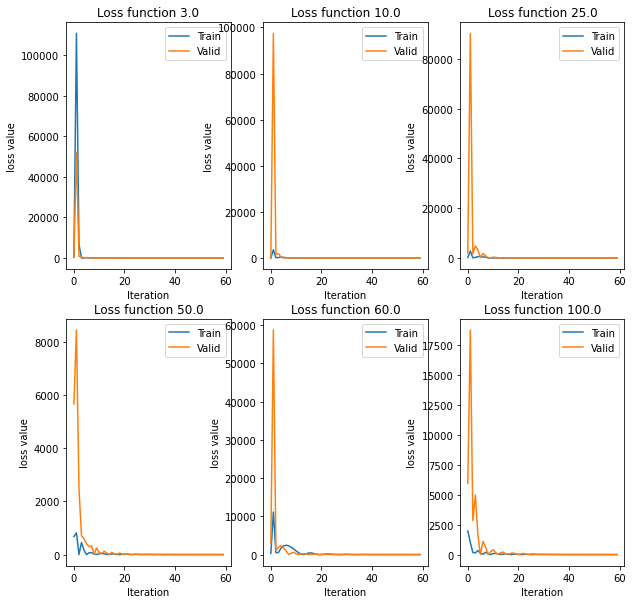

In [24]:
visualization_without_nl(History,real_layer)

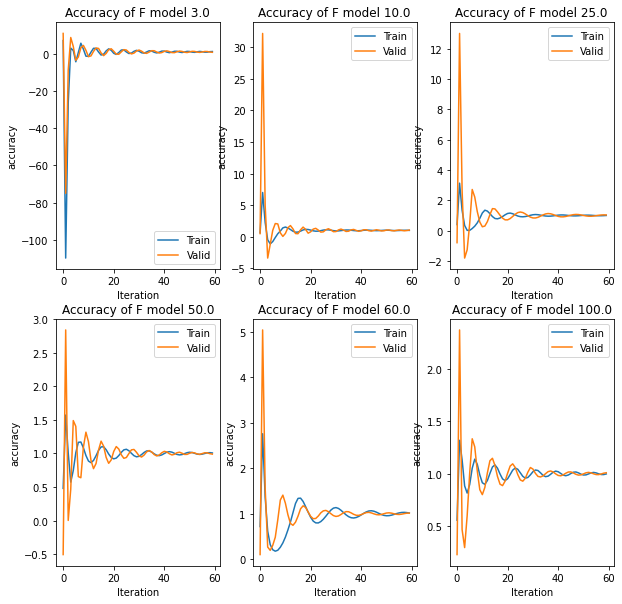

In [25]:
acc_visualization_without_nl(History2,real_layer)

In [26]:
print("Time cost: {}".format(total_cost))
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the training data as input, we obtain:")
cnt=0
for i in prediction_train:
    print("real: {}, prediction {}".format(real_layer[cnt],prediction_train[cnt]))
    cnt+=1
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the valid data as input, we obtain:")
cnt=0
for i in prediction_train:
    print("real: {}, prediction {}".format(real_layer[cnt],pridiction_valid[cnt]))
    cnt+=1

Time cost: 28.73285937309265
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the training data as input, we obtain:
real: 3.0, prediction 2.897207498550415
real: 10.0, prediction 9.88637924194336
real: 25.0, prediction 25.217992782592773
real: 50.0, prediction 49.92802047729492
real: 60.0, prediction 60.159217834472656
real: 100.0, prediction 100.46566772460938
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the valid data as input, we obtain:
real: 3.0, prediction 5.592121601104736
real: 10.0, prediction 10.144622802734375
real: 25.0, prediction 22.80717658996582
real: 50.0, prediction 50.00480270385742
real: 60.0, prediction 58.39067459106445
real: 100.0, prediction 104.24431610107422


# Train with normalization


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64

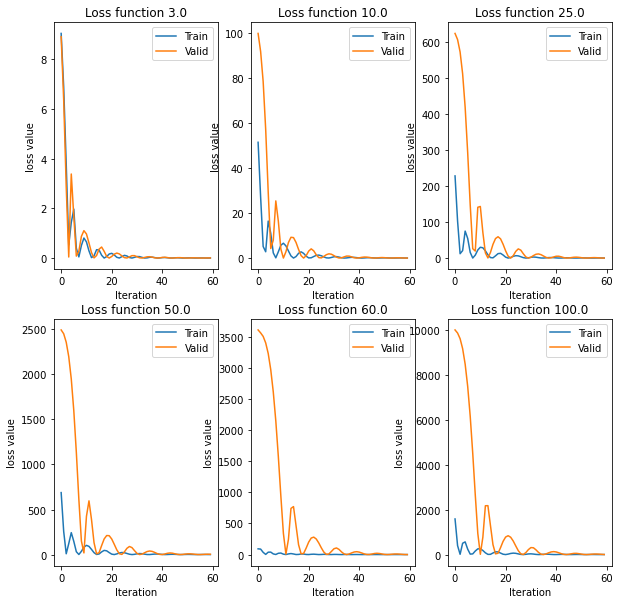

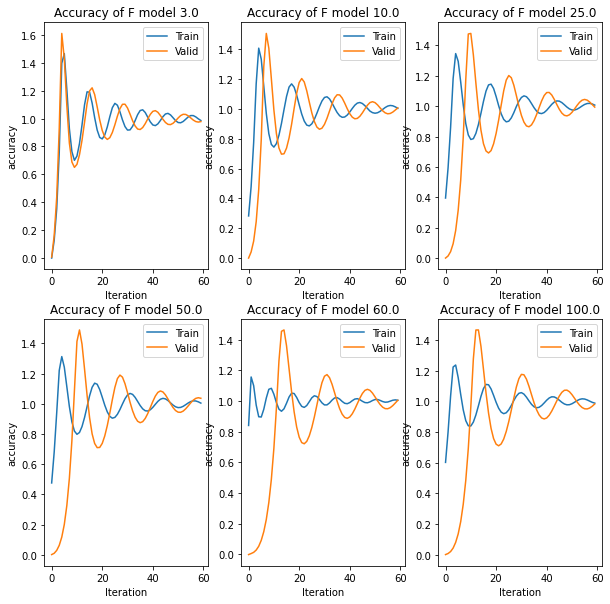

In [19]:
F=layer_initializer()
(train_x,__),(test_x,__)=keras.datasets.boston_housing.load_data()
np.random.shuffle(train_x)
np.random.shuffle(test_x)
real_layer=[3.,10.,25.,50.,60.,100.]
Input_train=normalize(train_x)[0:100]
Input_test=normalize(test_x)[0:100]
F(Input_train,1)
F.learn(1)
History=[]
history={}
History2=[]
history2={}
prediction_train=[]
pridiction_valid=[]
accuracy=[]
start=time.time()
for i in real_layer:
    history["t"],history2["t"]=F.train(60,Input_train,i,15)
    prediction_train.append(F(Input_train,15)[0][0])
    pridiction_valid.append(F(Input_test,15)[0][0])
    F=layer_initializer()
    history["v"],history2["v"]=F.train(60,Input_test,i,15)
    History.append(history)
    History2.append(history2)
    history={}
    history2={}
total_cost=time.time()-start
visualization(History,real_layer)
acc_visualization(History2,real_layer)

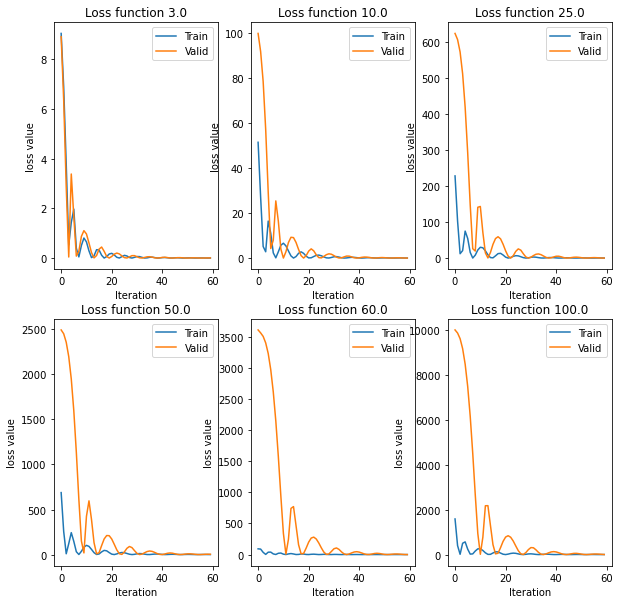

In [20]:
visualization(History,real_layer)

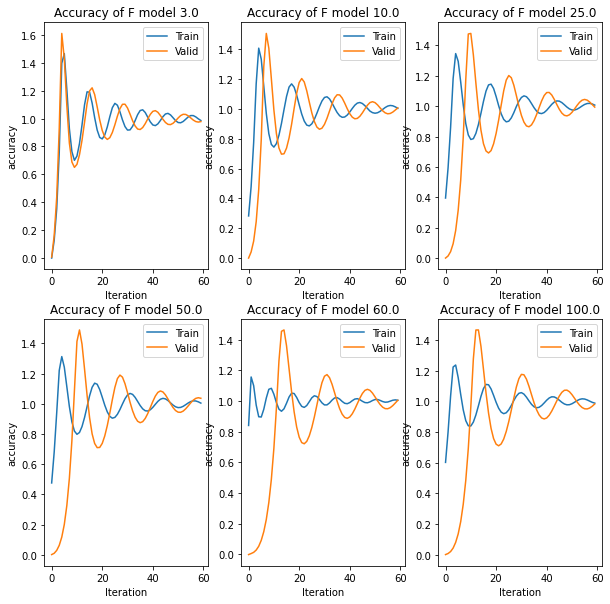

In [21]:
acc_visualization(History2,real_layer)

In [22]:
print("Time cost: {}".format(total_cost))
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the training data as input, we obtain:")
cnt=0
for i in prediction_train:
    print("real: {}, prediction {}".format(real_layer[cnt],prediction_train[cnt]))
    cnt+=1
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the valid data as input, we obtain:")
cnt=0
for i in prediction_train:
    print("real: {}, prediction {}".format(real_layer[cnt],pridiction_valid[cnt]))
    cnt+=1

Time cost: 10.331979036331177
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the training data as input, we obtain:
real: 3.0, prediction 2.9442832469940186
real: 10.0, prediction 9.931931495666504
real: 25.0, prediction 24.96173667907715
real: 50.0, prediction 49.766090393066406
real: 60.0, prediction 59.95795822143555
real: 100.0, prediction 98.72761535644531
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the valid data as input, we obtain:
real: 3.0, prediction 2.9359867572784424
real: 10.0, prediction 10.138628005981445
real: 25.0, prediction 25.42617416381836
real: 50.0, prediction 50.90190887451172
real: 60.0, prediction 60.9055061340332
real: 100.0, prediction 100.16236877441406


# In order to test the generalization capability of F model, we use it on both iris and boston housing dataset at the same time

In [4]:
from sklearn.datasets import load_iris
data=load_iris()
feature=data["data"]
F=layer_initializer()
train_x2,test_x2=feature[0:100],feature[50:150]
(train_x,__),(test_x,__)=keras.datasets.boston_housing.load_data()
np.random.shuffle(train_x)
np.random.shuffle(test_x)
np.random.shuffle(train_x2)
np.random.shuffle(test_x2)
Input_train=normalize(train_x)[0:100]
Input_test=normalize(test_x)[0:100]
Input_train2=normalize(train_x2)[0:100]
Input_test2=normalize(test_x2)[0:100]
real_layer=[3.,10.,25.,50.,60.,100.]
History=[]
history={}
History2=[]
history2={}
prediction_bh=[]
pridiction_iris=[]
accuracy=[]
start=time.time()
for i in real_layer:
    history["bh"],history2["bh"]=F.train(60,Input_train,i,15)
    history["iris"],history2["iris"]=F.train(60,Input_train2,i,15)
    prediction_bh.append(F(Input_test,15)[0][0])
    pridiction_iris.append(F(Input_test2,15)[0][0])
    History.append(history)
    History2.append(history2)
    history={}
    history2={}
total_cost=time.time()-start


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1,

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1,

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1,

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1,

(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 3, 64)


(1, 25, 3, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 1, 64)
(1, 25, 3, 64)
(1, 25, 1, 64)


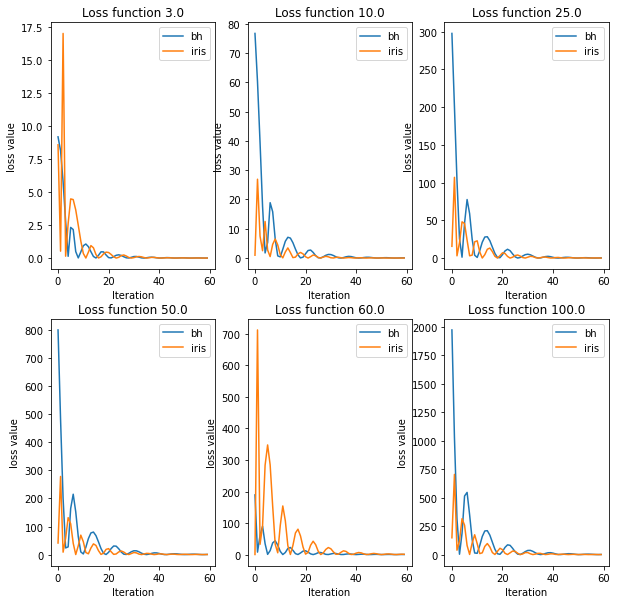

In [5]:
visualization_bh_iris(History,real_layer)

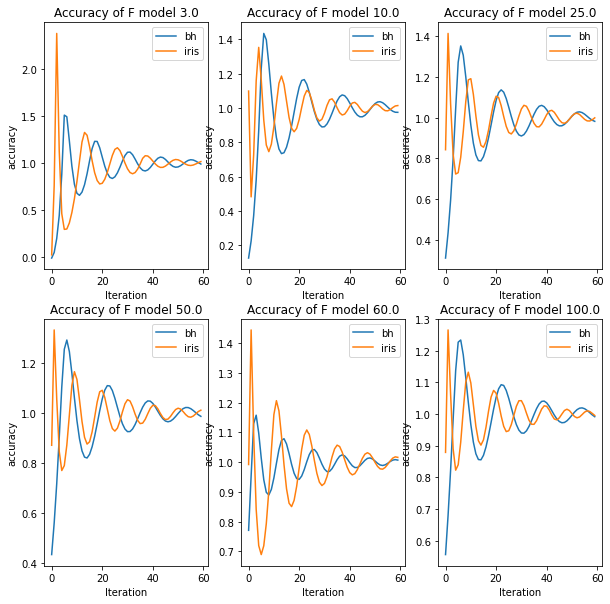

In [6]:
acc_visualization_iris_bn(History2,real_layer)

In [7]:
print("Time cost: {}".format(total_cost))
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the boston housing valid data as input, we obtain:")
cnt=0
for i in range(len(real_layer)):
    print("real: {}, prediction {}".format(real_layer[cnt],prediction_bh[cnt]))
    cnt+=1
print("When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the Iris valid data as input, we obtain:")
cnt=0
for i in range(len(real_layer)):
    print("real: {}, prediction {}".format(real_layer[cnt],pridiction_iris[cnt]))
    cnt+=1

Time cost: 9.029178380966187
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the boston housing valid data as input, we obtain:
real: 3.0, prediction 1.3010042905807495
real: 10.0, prediction 8.225397109985352
real: 25.0, prediction 23.073287963867188
real: 50.0, prediction 49.09004211425781
real: 60.0, prediction 59.011356353759766
real: 100.0, prediction 97.98760223388672
When the true label is set to 3, 10, 50 ,60, 100 in turn, using the well trained model, and the Iris valid data as input, we obtain:
real: 3.0, prediction 3.1401422023773193
real: 10.0, prediction 10.300270080566406
real: 25.0, prediction 25.888635635375977
real: 50.0, prediction 51.98412322998047
real: 60.0, prediction 62.2140007019043
real: 100.0, prediction 101.9514389038086
